# Visualize predictions on the validation set

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import torch
import os
import sys
import random
import cv2

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from models.model import get_model
from predict import predict

In [13]:
MODEL_PATH = "../../checkpoints/old_model.pth"

In [14]:
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
DEVICE

device(type='mps')

In [15]:
model = get_model(num_classes=19).to(DEVICE)
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE)["model_state_dict"])

<All keys matched successfully>

In [16]:
pred = predict(model, "../../data/processed/images/val/9b970e47-ce2164fd.jpg", DEVICE)

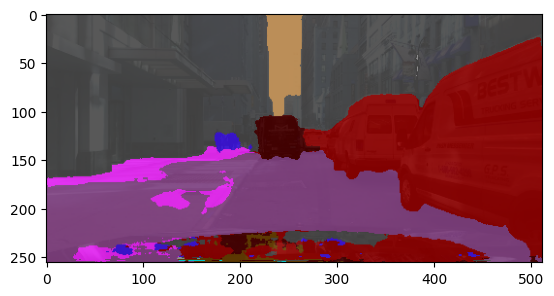

In [17]:
plt.imshow(pred)

In [18]:
def get_samples(image_dir, color_label_dir, num_samples):
    all_images = sorted(os.listdir(image_dir))
    indices = random.sample(range(len(all_images)), num_samples)

    img_paths = [os.path.join(image_dir, all_images[i]) for i in indices]
    label_paths = [f"{path[:-4]}_train_color.png" for path in img_paths]
    
    return img_paths, label_paths

In [28]:
def display_predictions(model, image_dir, color_label_dir, device, num_samples=8):
    img_paths, label_paths = get_samples(image_dir, color_label_dir, num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(18, 5 * num_samples))
    
    for i in range(num_samples):
        # load original image
        img_bgr = cv2.imread(img_paths[i])
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        # load ground truth color mask
        gt_filename = os.path.basename(label_paths[i])
        gt_path = os.path.join(color_label_dir, gt_filename)
        gt_mask = cv2.imread(gt_path)
        gt_mask = cv2.cvtColor(gt_mask, cv2.COLOR_BGR2RGB)

        # 3. Get Prediction Overlay from your existing function
        # Note: predict returns BGR, so we convert for matplotlib
        pred_overlay_bgr = predict(model, img_paths[i], device)
        pred_overlay_rgb = cv2.cvtColor(pred_overlay_bgr, cv2.COLOR_BGR2RGB)
        
        # Plotting
        ax_img = axes[i, 0] if num_samples > 1 else axes[0]
        ax_gt = axes[i, 1] if num_samples > 1 else axes[1]
        ax_pred = axes[i, 2] if num_samples > 1 else axes[2]

        ax_img.imshow(img_rgb)
        ax_img.set_title(f"Original: {os.path.basename(img_paths[i])}")
        ax_img.axis('off')

        ax_gt.imshow(gt_mask)
        ax_gt.set_title("Ground Truth (Color)")
        ax_gt.axis('off')

        ax_pred.imshow(pred_overlay_rgb)
        ax_pred.set_title("Model Prediction (Overlay)")
        ax_pred.axis('off')
        # display original image
        
        # display label

        # display prediction
    plt.tight_layout()
    plt.savefig("predictions.png")
    plt.show()
        

In [29]:
image_dir = '../../data/processed/images/val'
color_label_dir = '../../data/processed/color_labels/val'

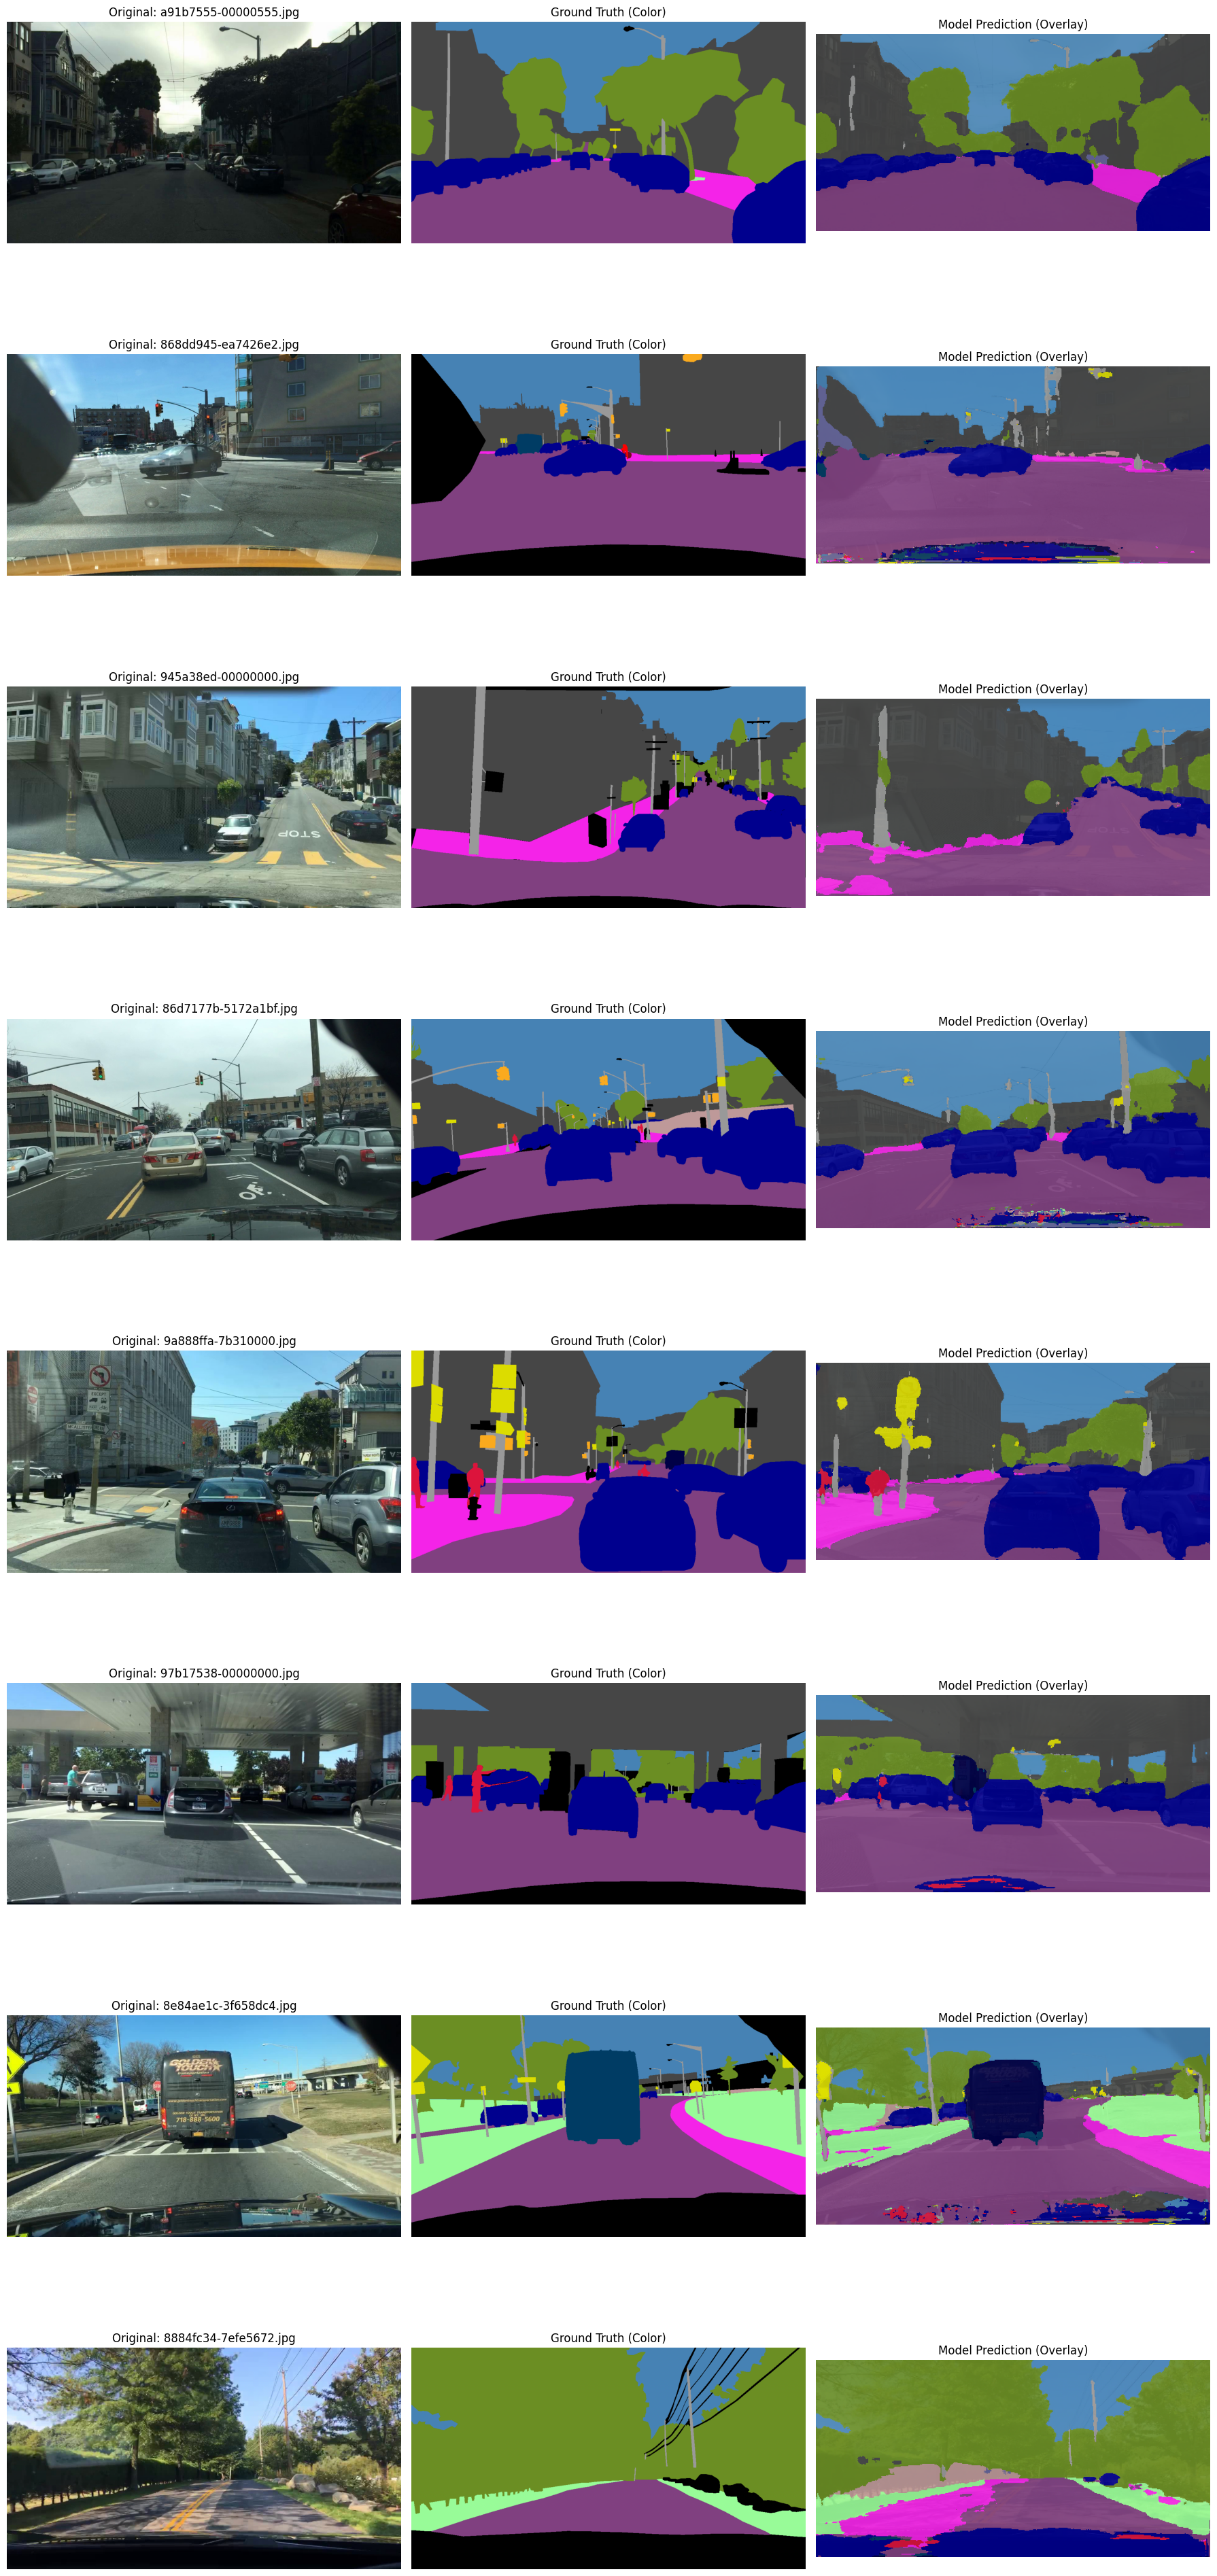

In [31]:
display_predictions(model, image_dir, color_label_dir, DEVICE, 8)